# Homework : Week 1
### José Moran

In [1]:
%pylab inline

import numpy as np 
import random
import matplotlib.pyplot as plt
np.set_printoptions(precision = 4, suppress=True)

Populating the interactive namespace from numpy and matplotlib


## Part 1

In [2]:
def markov_pi(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
           x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits

In [3]:
n_runs = 1000
delta = 0.1

We create a function to calculate the average value obtained for pi in the simulation, as well as the average of the square value obtained, so that we can get the variance on our simulation of fixed length n_runs.

In [4]:
def average_values(n_trials, delta=0.1, n_runs=1000):
    values = np.zeros(n_runs)
    sqvals = np.zeros(n_runs)
    for run in xrange(n_runs):
        values[run] = 4.0 * markov_pi(n_trials, delta) /float(n_trials)
        sqvals[run] = values[run]**2
    avg = np.mean(values)
    sqavg = np.mean(sqvals)
    return avg, sqavg

### 1.1
We then proceed to calculate the average value obtained for $\pi$ with increasing values of n_trials, calculating the variance as well. 

In [5]:
trials = [500, 1000, 2000, 10000, 15000, 20000]

In [6]:
for n_trials in trials:
    avg, sqavg = average_values(n_trials)
    print "Average value for %d trials : %f with variance %f" % (n_trials, avg, np.sqrt(sqavg-avg**2))

Average value for 500 trials : 2.737264 with variance 0.602652
Average value for 1000 trials : 2.915680 with variance 0.447955
Average value for 2000 trials : 3.020376 with variance 0.321188
Average value for 10000 trials : 3.118800 with variance 0.142465
Average value for 15000 trials : 3.125766 with variance 0.113789
Average value for 20000 trials : 3.131626 with variance 0.099175


The value seems to approach $\pi$, we get a close enough value for $2\cdot 10^4$ trials and we get an increasingly small variance, implying that our algorithm converges. 

We now will calculate the acceptance ratio and see how it varies with the length of the Monte-Carlo step $\Delta$.

In [7]:
def markov_pi2(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0 
    n_acc = 0
    for i in xrange(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x+del_x) < 1.0 and abs(y+del_y) < 1.0:
            x, y = x+del_x, y+del_y
            n_acc+=1
        if x**2+y**2<1.0: n_hits += 1
    return n_hits, n_acc/float(N)
    

In [8]:
deltas = np.arange(0.1, 5.1, 0.1)

In [9]:
ratios = []
n_runs = 500
n_trials = 1000
for delta in deltas:
    accept = np.zeros(n_runs)
    for run in xrange(n_runs):
        n_hits, acc = markov_pi2(n_trials,delta)
        accept[run]=acc
    ratios.append(np.mean(accept))

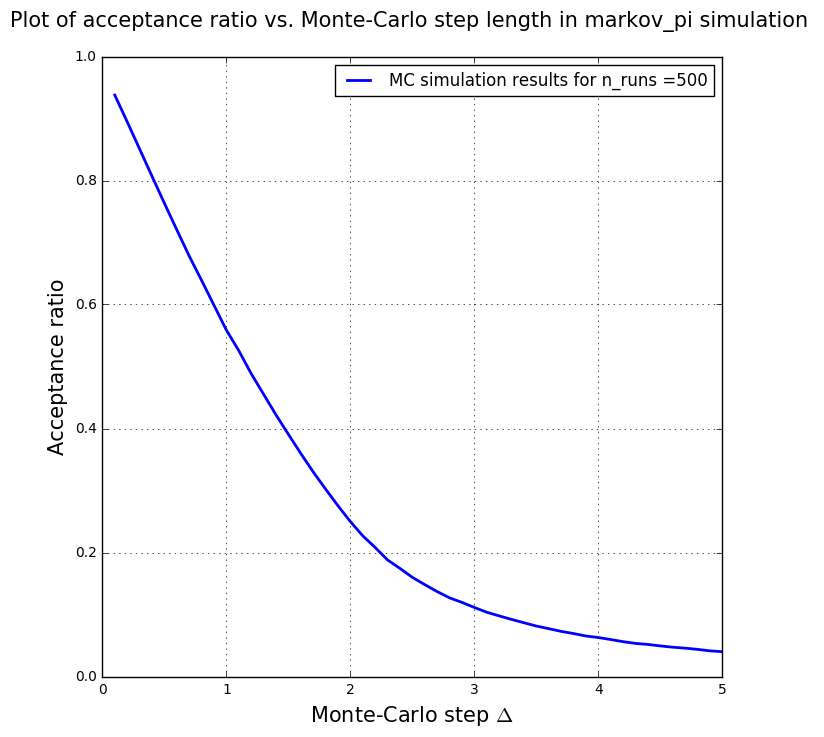

In [10]:
fig = plt.figure(figsize(8,8))
plt.plot(deltas,ratios, ls='-', lw=2, label = "MC simulation results for n_runs ="+str(n_runs))
plt.legend()
plt.grid()
plt.xlabel("Monte-Carlo step $\Delta$", fontsize=15)
plt.ylabel("Acceptance ratio", fontsize=15)
plt.title("Plot of acceptance ratio vs. Monte-Carlo step length in markov_pi simulation \n", fontsize=15)
plt.show()
plt.close()

To find the optimal value that gets us an acceptance ratio of 0.5, we zoom into the area in the following plot.

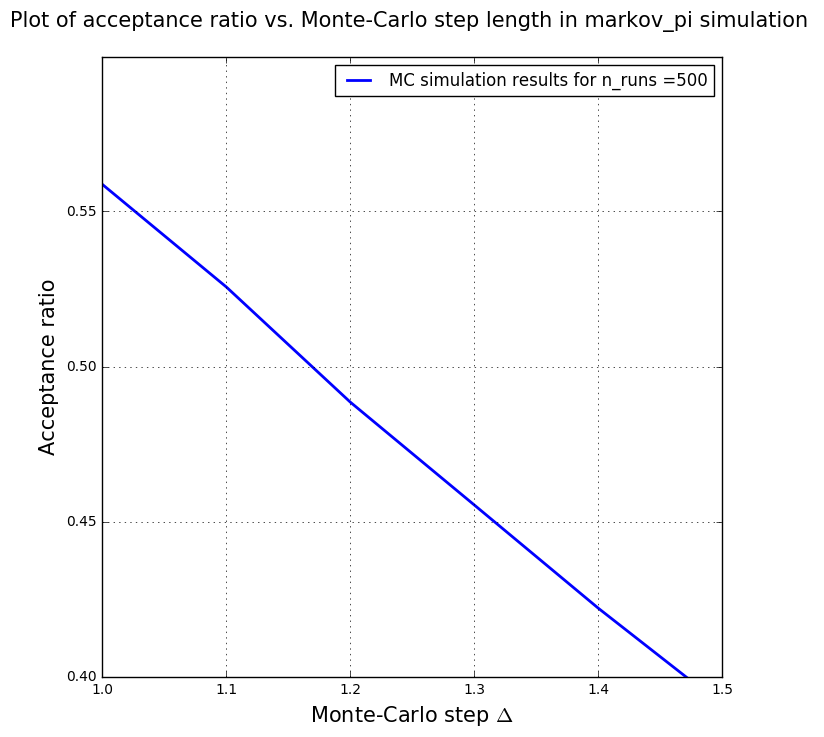

In [11]:
fig = plt.figure(figsize(8,8))
plt.plot(deltas,ratios, ls='-', lw=2, label = "MC simulation results for n_runs ="+str(n_runs))
plt.legend()
ymin, ymax = 0.4, 0.6
xmin, xmax = 1,1.5
plt.axis([xmin,xmax,ymin,ymax])
plt.grid()
plt.xlabel("Monte-Carlo step $\Delta$", fontsize=15)
plt.ylabel("Acceptance ratio", fontsize=15)
plt.title("Plot of acceptance ratio vs. Monte-Carlo step length in markov_pi simulation \n", fontsize=15)
plt.show()
plt.close()

### 1.2
The interval is therefore $[1.15,1.25]$

### 1.3
Let us now see how the standard deviation varies with $\Delta$.

In [12]:
std_dev = []
n_runs = 500
n_trials = 1000
for delta in deltas:
    sqvalues = np.zeros(n_runs)
    values = np.zeros(n_runs)
    for run in xrange(n_runs):
        n_hits, acc = markov_pi2(n_trials,delta)
        values[run] = 4.0 * n_hits /float(n_trials)
        sqvalues[run] = values[run]**2
    std_dev.append(np.mean(sqvalues)-(np.mean(values)**2))

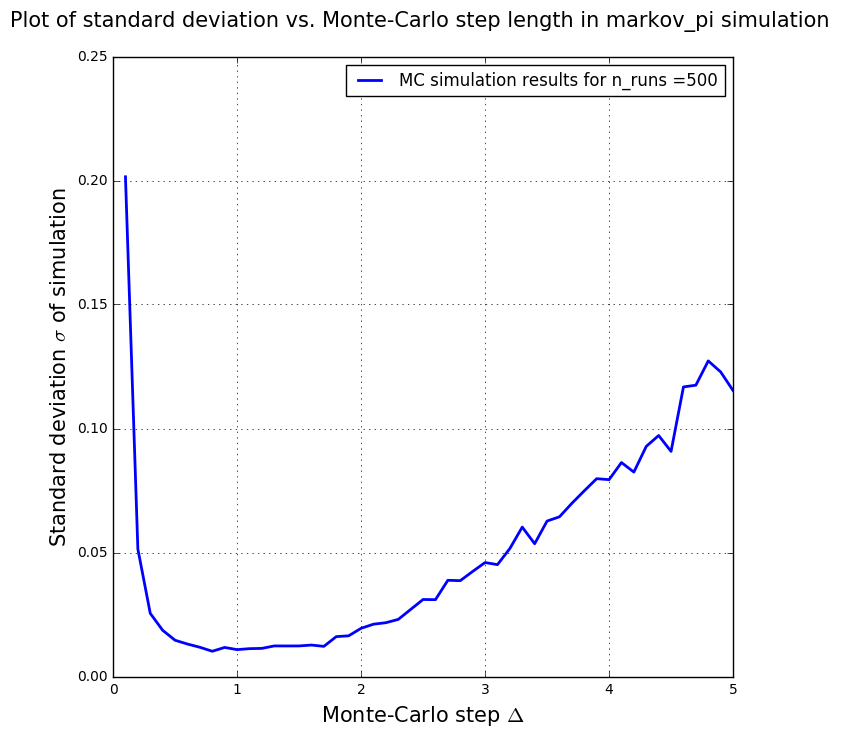

In [13]:
fig = plt.figure(figsize(8,8))
plt.plot(deltas,std_dev, ls='-', lw=2, label = "MC simulation results for n_runs ="+str(n_runs))
plt.legend()
plt.grid()
plt.xlabel("Monte-Carlo step $\Delta$", fontsize=15)
plt.ylabel("Standard deviation $\sigma$ of simulation", fontsize=15)
plt.title("Plot of standard deviation vs. Monte-Carlo step length in markov_pi simulation \n", fontsize=15)
plt.show()
plt.close()

We can therefore see that the standard deviation has a minimum around $\Delta=1$. **This seems show that our rule of thumb of choosing an acceptance ratio of 0.5 is valid**.

## Part 2 

In the page-rank algorithm, if we are in a page $A\in E$ where $E$ is the set of all pages, since at each step we choose a link at random (that is with uniform probability) and follow it, it is quite immediate that the transition rate of our Monte-Carlo chain is : 

$t_{A\rightarrow B} = \left\{\begin{matrix}
\frac{1}{C(A)} &\mbox{ if A and B are linked }\\  
0 &\mbox{ else}
\end{matrix}\right. $ 

where $C(A)$ is the number of links at page $A$. 

If we apply this to our balance equation : 

$\begin{align}\sum_{B\in E\setminus A} \mathbb{P}(B) t_{B\rightarrow A} &= \sum_{B\in E\setminus A} \mathbb{P}(A) t_{A\rightarrow B} \\
 &= \mathbb{P}(A) \end{align} $
 
Then we immediately get $\mathbb{P}(A)=\sum \frac{\mathbb{P}(B_i)}{C(B_i)}$

Let us now implement this using the method from tutorial 1 

In [14]:
neighbors =  np.asarray([[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]])

#calculate the number of links in a given page that lead to a new page
links = np.zeros(9)
for i in xrange(9):
    links[i] = np.sum(neighbors[i]!=i)

#calculate transfer matrix, imposing that we always go to a new page
transfer = np.zeros((9,9))
for a in xrange(9):
    for b in neighbors[a]:
        transfer[a,b] = 1/float(links[b]) if a!=b else 0

print transfer

[[ 0.      0.3333  0.      0.3333  0.      0.      0.      0.      0.    ]
 [ 0.5     0.      0.5     0.      0.25    0.      0.      0.      0.    ]
 [ 0.      0.3333  0.      0.      0.      0.3333  0.      0.      0.    ]
 [ 0.5     0.      0.      0.      0.25    0.      0.5     0.      0.    ]
 [ 0.      0.3333  0.      0.3333  0.      0.3333  0.      0.3333  0.    ]
 [ 0.      0.      0.5     0.      0.25    0.      0.      0.      0.5   ]
 [ 0.      0.      0.      0.3333  0.      0.      0.      0.3333  0.    ]
 [ 0.      0.      0.      0.      0.25    0.      0.5     0.      0.5   ]
 [ 0.      0.      0.      0.      0.      0.3333  0.      0.3333  0.    ]]


In [15]:
#We check the normalization for the columns
print("summing columns")
print([ sum(transfer[:,j]) for j in range(9)])

summing columns
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


We have thus created our transfer matrix $T$. We will now see how the position of a random walker using the page-rank algorithm converges (or doesn't....) to a stationary probability distribution. To do this, we'll start off with a position uniformly distributed among all sites. 

In [16]:
position = 1/9.*np.ones(9)

In [17]:
positions = []
steps = [5,10,100]
for i in range(101):
    position = np.dot(transfer,position)
    if i in steps:
        positions.append(position)

In [18]:
def bar_plot(pos, it):
    figure = plt.figure(figsize(5,4))
    plt.bar(range(len(pos)), pos, width=0.95)
    plt.axis([0,9,0,1])
    plt.grid()
    plt.xlabel("Page number")
    plt.ylabel("Page-rank probability")
    plt.title("Page-rank plot at t="+str(it))
    plt.show()

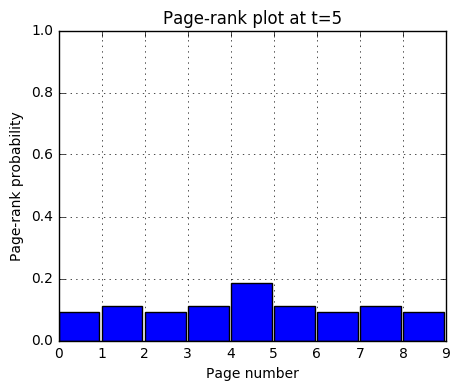

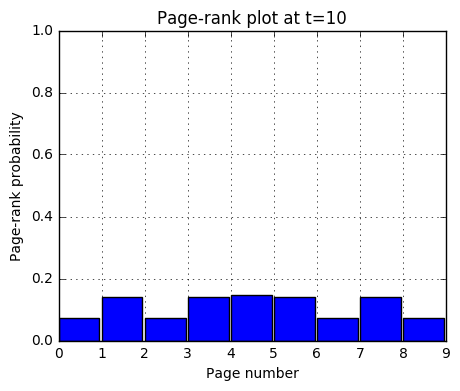

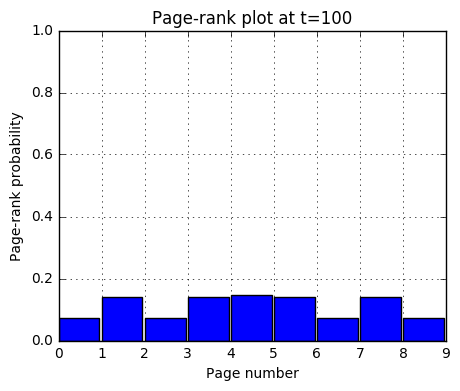

In [19]:
for i in range(len(positions)):
    bar_plot(positions[i],steps[i])

Let's now try with a different starting probability, namely placing the random-walker at the central page (labeled 4) : 

In [20]:
position = np.zeros(9)
position[4]=1.
positions = []
steps = [5,10,100]
for i in range(101):
    position = np.dot(transfer,position)
    if i in steps:
        positions.append(position)

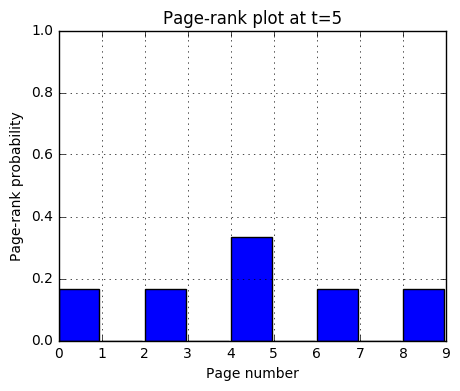

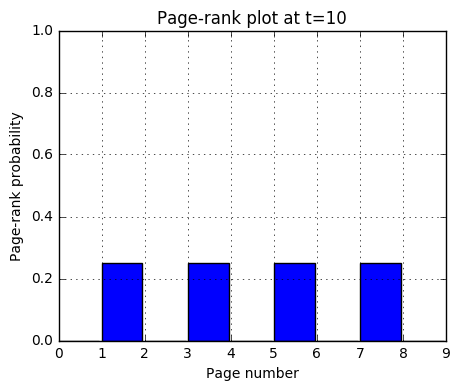

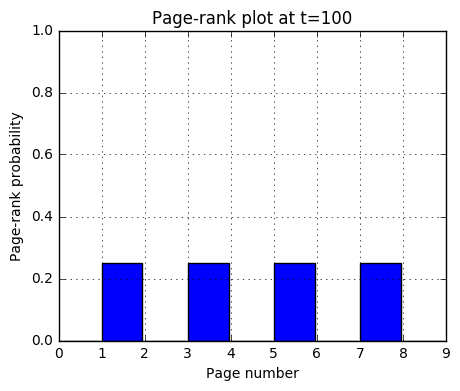

In [21]:
for i in range(len(positions)):
    bar_plot(positions[i],steps[i])

Let's see what happens if we pick steps of different parity : 

In [22]:
position = np.zeros(9)
position[4]=1.
positions = []
steps = [5,89,94]
for i in range(101):
    position = np.dot(transfer,position)
    if i in steps:
        positions.append(position)

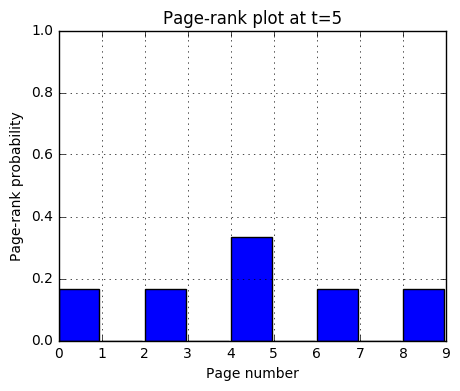

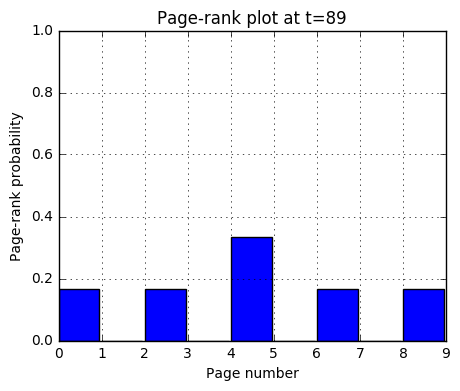

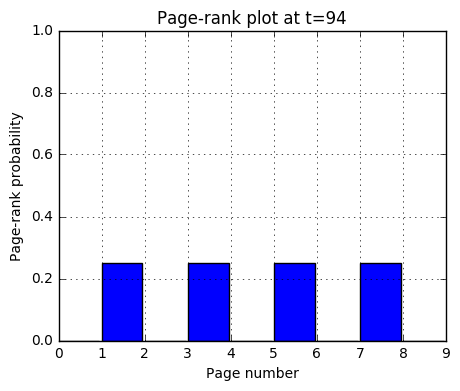

In [23]:
for i in range(len(positions)):
    bar_plot(positions[i],steps[i])

The probability distribution seems to be radically different if the iteration t is even or odd. Let's look at the spectrum of $T$: 

In [24]:
w, v = np.linalg.eig(transfer)
print w

[ 1.0000+0.j -1.0000+0.j -0.5774+0.j -0.5774+0.j  0.5774+0.j  0.5774+0.j
  0.0000+0.j  0.0000-0.j  0.0000+0.j]


We have -1 as an eigenvalue, which means that, in the general case, we will not reach the desired stationary probability because of the oscillations induced by this eigenvalue. Let's look at the purely antiperiodic eigenvector (for eigenvalue -1) as well as the "desired" distribution (the eigenvector for 1).

In [25]:
prank = v[:,0]/np.sum(v[:,0])
antip = v[:,1]

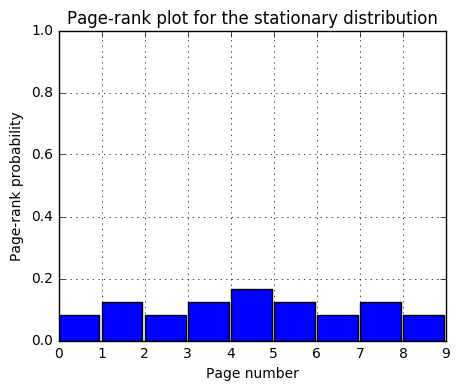

In [26]:
figure = plt.figure(figsize(5,4))
plt.bar(range(len(prank)), np.real(prank), width=0.95)
plt.axis([0,9,0,1])
plt.grid()
plt.xlabel("Page number")
plt.ylabel("Page-rank probability")
plt.title("Page-rank plot for the stationary distribution")
plt.show()

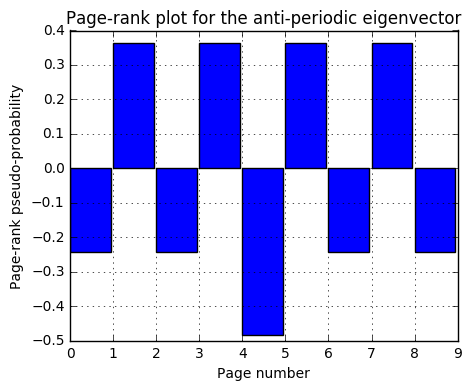

In [27]:
figure = plt.figure(figsize(5,4))
plt.bar(range(len(antip)), np.real(antip), width=0.95)
plt.grid()
plt.xlabel("Page number")
plt.ylabel("Page-rank pseudo-probability")
plt.title("Page-rank plot for the anti-periodic eigenvector")
plt.show()

Thus the naive page rank algorithm we use doesn't seem to work in every single case. If we imagine a linear combination of eigenvectors, including the one with eigenvalue -1, such that we have an initial well-normed probability distribution, we will not converge to a stationary distribution allowing us to rank our pages. 

The ranking for the stationary distribution however is the following. Predictably, the central (4-th) page is the most likely, and thus highest ranked one. 

In [30]:
print "Ranking, from top to bottom :"
for i in prank.argsort()[::-1]:
    print "Page "+str(i)+": PageRank "+str(np.real(prank[i]))

Ranking, from top to bottom :
Page 4: PageRank 0.166666666667
Page 7: PageRank 0.125
Page 5: PageRank 0.125
Page 3: PageRank 0.125
Page 1: PageRank 0.125
Page 6: PageRank 0.0833333333333
Page 0: PageRank 0.0833333333333
Page 2: PageRank 0.0833333333333
Page 8: PageRank 0.0833333333333


#### Dead-ends and spider traps

The first graph is the only one with a dead end, namely page 5. Let's write the adjacency matrix (neighbors array) as well as the transfer matrix for both prescriptions. In all cases, page i will be indexed by i-1 here.

In [2]:
#neighbors[i] is the list of pages that i has a link to
neighbors = np.asarray([[1,2],[0,3],[3,0],[2,1,4],[]])

#transfer matrices for first and second prescriptions : 
transfer1, transfer2 = np.zeros((5,5)), np.zeros((5,5))
#number of links per page
links= np.zeros(5)
for i in xrange(5):
    links[i]=len(neighbors[i])
    


In [3]:
for a in xrange(5):
    for b in neighbors[a]:
        transfer1[b,a] = 1/links[a]
        transfer2[b,a] = 1/links[a]
    if links[a]==0:
        transfer1[b,b]=1
        for b in range(5):
            transfer2[b,a] = 1/4. if b!=a else 0

In [4]:
#check for normalization of the transfer matrices
print("summing columns")
print([ sum(transfer1[:,j]) for j in range(5)])
print([ sum(transfer2[:,j]) for j in range(5)])

summing columns
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]


We will now calculate the eigenvalues and the stationary distributions : 

In [5]:
w1, v1 = np.linalg.eig(transfer1)
w2, v2 = np.linalg.eig(transfer2)

In [6]:
print "Eigenvalues of the transfer matrix for the first prescription "
print w1
print "Eigenvalues of the transfer matrix for the second prescription "
print w2

Eigenvalues of the transfer matrix for the first prescription 
[ 1.     -0.9129  0.9129 -0.     -0.    ]
Eigenvalues of the transfer matrix for the second prescription 
[-0.9082  1.     -0.0918  0.      0.    ]


In [7]:
prank1 = v1[:,0]/np.sum(v1[:,0])
prank2 = v2[:,1]/np.sum(v2[:,1])


We can now evaluate the page-rank for the first and second prescriptions. We will shift the index in the array by 1 to be more conform to the notation in the graph.

In [8]:
ranks = [prank1, prank2]
for i in range(2):
    print "======================================================================="
    print "Page Rank, top to bottom, prescription "+str(i+1)
    for t in ranks[i].argsort()[::-1]:
        print "Page "+str(t+1)+": PageRank "+str(np.real(ranks[i][t]))

Page Rank, top to bottom, prescription 1
Page 5: PageRank 1.0
Page 4: PageRank 0.0
Page 3: PageRank 0.0
Page 2: PageRank 0.0
Page 1: PageRank 0.0
Page Rank, top to bottom, prescription 2
Page 1: PageRank 0.24
Page 4: PageRank 0.24
Page 3: PageRank 0.22
Page 2: PageRank 0.22
Page 5: PageRank 0.08


#### Conclusion

Clearly, the first prescription leads to faulty dynamics : the walker eventually gets trapped in a dead-end, and the dead-end gets a pretty high ranking. Prescription 2 is much better, it stops us from getting stuck in local configurations, such as dead ends.

#### Damping

If we have a Markov chain such that : 

$\pi (t+1) = d\cdot T \pi(t) + \frac{1-d}{n}\mathbb{1}$

then this simply amounts to having a new transition matrix $T'= d\cdot T + \frac{1-d}{n}e$, where e is the matrix with ones, that still has proper normalization (one can check by summing on the columns, the d factor in front of T compensates the n-terms with factor $\frac{1-d}{n}$).

Since we had established that for the stationary probability $\mathbb{P}$

$ \begin{align}
\mathbb{P}(A) &=\sum_{B\in E\setminus A} \mathbb{P}(B) t_{B\rightarrow A} \\
&=  \sum_{B\in E\setminus A} \mathbb{P}(B) T_{AB}
\end{align}$ 

It follows immediately, using the new transition matrix, that 
$\mathbb{P}(A)=\frac{1-d}{n}+d\sum \frac{\mathbb{P}(B_i)}{C(B_i)}$

#### PageRank performance

Let's write the neighbors matrix for this new graph, where neighbors[i] is an array that tells us which pages page i links to.

In [45]:
neighbors = [[1,5],[0,5],[0],[0],[0,2],[7],[5],[6,5]]
#damping 
d = 0.85
links= np.zeros(8)
for i in xrange(8):
    links[i]=len(neighbors[i])
    
#Naive ranking : we rank by links received : 

received = np.zeros(8)
for page in xrange(8):
    for link in neighbors[page]:received[link]+=1
        
#PageRank : we calculate the transfer matrix, including damping
transfer = np.zeros((8,8))
for a in xrange(8):
    for b in neighbors[a]:
        transfer[b,a] = 1/links[a]

transfer = d*transfer + (1-d)/8*np.ones(8)
w,v = np.linalg.eig(transfer)

prank=v[:,0]/np.sum(v[:,0])

print "======================================================"
print "Naive ranking results : top to bottom "
for t in received.argsort()[::-1]:
    print "Page "+str(t+1)+": links received : "+str(received[t])
print "======================================================"
print "PageRank results : top to bottom "
for t in prank.argsort()[::-1]:
    print "Page "+str(t+1)+": PageRank : "+str(np.real(prank[t]))

Naive ranking results : top to bottom 
Page 6: links received : 4.0
Page 1: links received : 4.0
Page 8: links received : 1.0
Page 7: links received : 1.0
Page 3: links received : 1.0
Page 2: links received : 1.0
Page 5: links received : 0.0
Page 4: links received : 0.0
PageRank results : top to bottom 
Page 6: PageRank : 0.336471108708
Page 8: PageRank : 0.304750442402
Page 7: PageRank : 0.148268938021
Page 1: PageRank : 0.0895022883295
Page 2: PageRank : 0.05678847254
Page 3: PageRank : 0.02671875
Page 5: PageRank : 0.01875
Page 4: PageRank : 0.01875


Indeed both methods seem privilege pages with high connectivity. However, by only counting incoming links, and not taking account of the dynamics of pages that link each other reciprocally, the naive ranking loses a lot of nuances. We see that the PageRank is much more differentiated, as it could, for instance, distinguish page 3, who is only linked by page 5 (quite probably a spam site, as noone links to it), from page 2, who is linked by 1 which seems to be a completely legitimate page.

By taking account of the true dynamics of sites (a link coming from a site that is referred to by many other sites is much more important than a link coming from a spam site), PageRank is the better choice.